## Assignment 11 Decision Tree. Supervised ML. Question 01. 
### Dataset :-  Company_Data


### Quick info.about Decision Tree algorithm / Classifier
#### Info :- 
Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. 
It can be utilized for both classification and regression kind of problem.
like tree structure.
internal node represents attribute.
branch represents a decision rule, and each leaf node represents the outcome.
topmost node in a decision tree is known as the root node. 
It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive 
partitioning.
Decision Tree is a white box type of ML algorithm.
It shares internal decision making logic, which is not available in the black box type of algorithms such as Neural    Network.
Its training time is faster compared to the neural network algorithm.
The time complexity of decision trees is a function of the number of records and number of attributes in the given data. 
The decision tree is a distribution free or non parametric method, which does not depend upon probability distribution assumptions. 
Decision trees can handle high dimensional data with good accuracy.

#### Advantages 
1) Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
2) A decision tree does not require normalization of data.
3) A decision tree does not require scaling of data as well.
4) Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
5) A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

#### Disadvantage
1) A small change in the data can cause a large change in the structure of the decision tree causing instability.
2) For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
3) Decision tree often involves higher time to train the model.
4) Decision tree training is relatively expensive as the complexity and time has taken are more.
5) The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.



In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
Company_Data = pd.read_csv("D:\Data Science Material\Assignments\Decision tree\Company_Data.csv")

In [3]:
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
Company_Data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
Company_Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
Company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Data analysis

In [7]:
Company_Data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

no NAN value

In [8]:
Company_Data.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
Company_Data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
Company_Data.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [11]:
Company_Data.shape

(400, 11)

## Data Wrangling \ Cleaning

In [12]:
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
# making original dataset safe and its copy in use
Company_Data01 = Company_Data.copy()

In [14]:
Company_Data01.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Outlier 

In [15]:
Company_Data01.mean()

Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [16]:
# making data in to categotical form 

Company_Data01.loc[Company_Data01["Sales"]>=7.49,"Income"]="Good"
Company_Data01.loc[Company_Data01["Sales"]<=7.49,"Income"]="Risky"
Company_Data01.drop('Sales',inplace = True,axis = 1)

In [17]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,2)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = Company_Data01.columns.tolist()
features.remove('Income')
features

['CompPrice',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

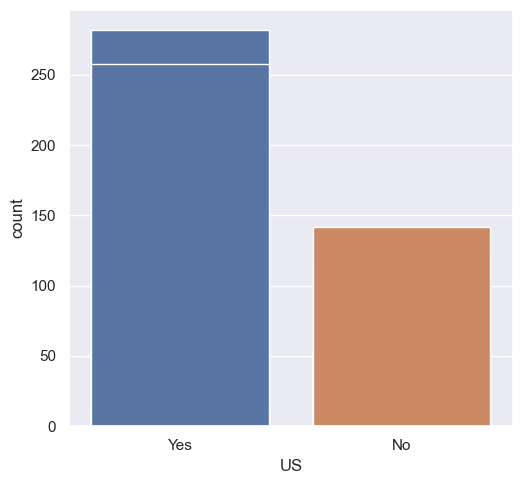

In [18]:
count_plot(Company_Data01, features)
plt.show()

In [19]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(Company_Data01[features])
Company_Data01_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[ 49.,  11., 141., ...,   7.,   1.,   1.],
       [ 22.,  16., 129., ...,   0.,   1.,   1.],
       [ 24.,  10., 138., ...,   2.,   1.,   1.],
       ...,
       [ 71.,  12., 195., ...,   8.,   1.,   1.],
       [ 12.,   7., 145., ...,   2.,   1.,   1.],
       [ 45.,   0.,  12., ...,   6.,   1.,   1.]])

In [20]:
Company_Data01_encoded.head()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0


In [21]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(Company_Data01['Income'])
Company_Data01_encoded['Income'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'R

In [22]:
Company_Data01_encoded.head()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0,0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0,0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0,1
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0,1


In [23]:
# converting sales float in to int type
#Company_Data01['Sales'] = Company_Data01['Sales'].astype(int)

In [24]:
#ShelveLoc = pd.get_dummies(Company_Data01['ShelveLoc'],drop_first=True)

In [25]:
#Urban = pd.get_dummies(Company_Data01['Urban'],drop_first = True)

In [26]:
#US = pd.get_dummies(Company_Data01['US'],drop_first = True)

In [27]:
#Company_Data01 = pd.concat([Company_Data01,ShelveLoc,Urban,US],axis=1)

In [28]:
#Company_Data01.drop(['ShelveLoc','Urban','US'],inplace = True,axis = 1)

In [29]:
Company_Data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    object
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
dtypes: int64(6), object(4)
memory usage: 31.4+ KB


## Visualization 
### Matplotlib plots

In [30]:
Company_Data01.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,Good,11,276,120,Bad,42,17,Yes,Yes


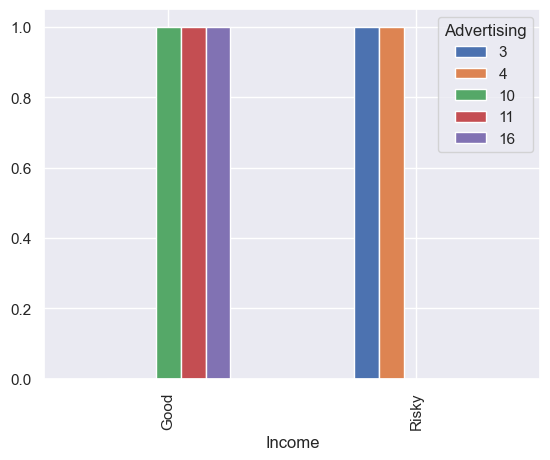

In [32]:
# barplot betn two diff. category
pd.crosstab(Company_Data01.Income.head(5),Company_Data01.Advertising.head(5)).plot(kind='bar')
plt.show()

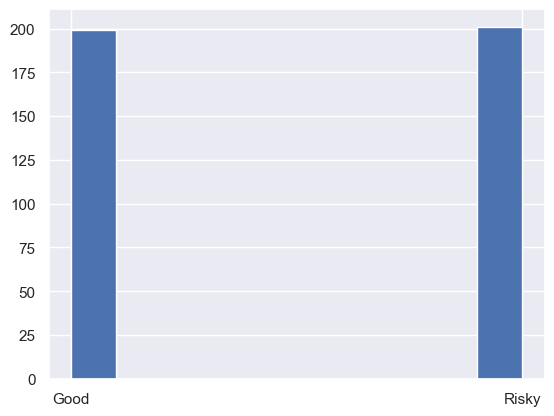

In [33]:
# histogram
plt.hist(Company_Data01.Income)
plt.show()

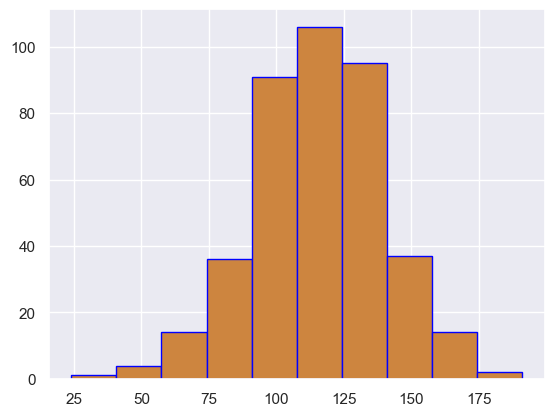

In [34]:
# histogram
plt.hist(Company_Data01.Price,facecolor ="peru",edgecolor ="blue")
plt.show()

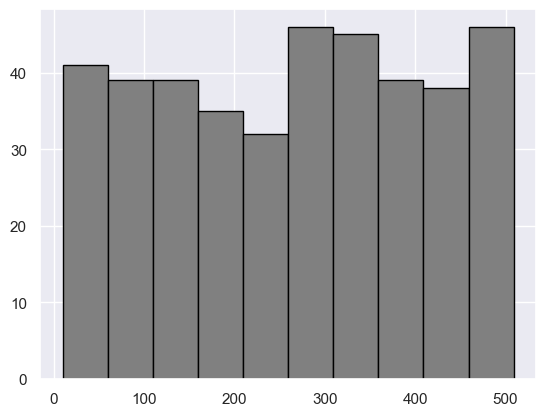

In [35]:
plt.hist(Company_Data01.Population,facecolor ="gray",edgecolor ="black")
plt.show()

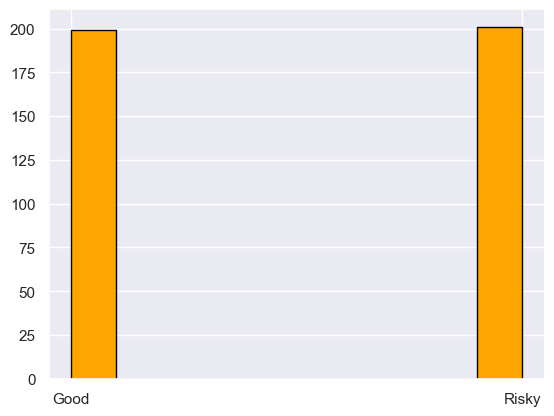

In [36]:
plt.hist(Company_Data01.Income,facecolor ="orange",edgecolor ="black")
plt.show()

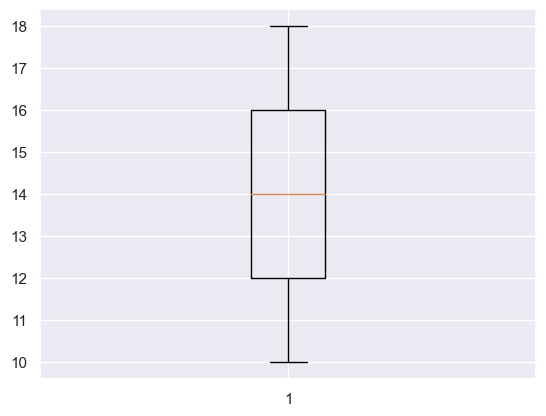

In [39]:
# boxplot
plt.boxplot(Company_Data01.Education,vert = True)
plt.show()

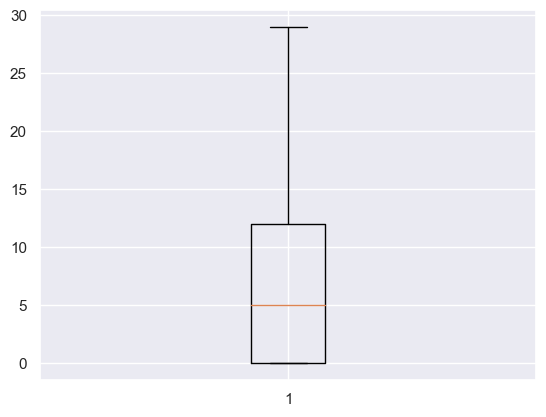

In [40]:
# boxplot
plt.boxplot(Company_Data01.Advertising,vert = True)
plt.show()

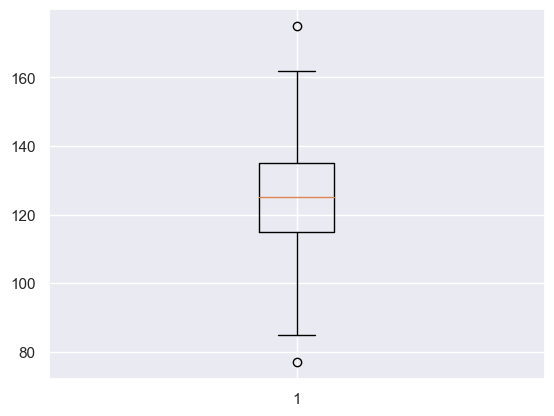

In [41]:
# boxplot
plt.boxplot(Company_Data01.CompPrice,vert = True)
plt.show()

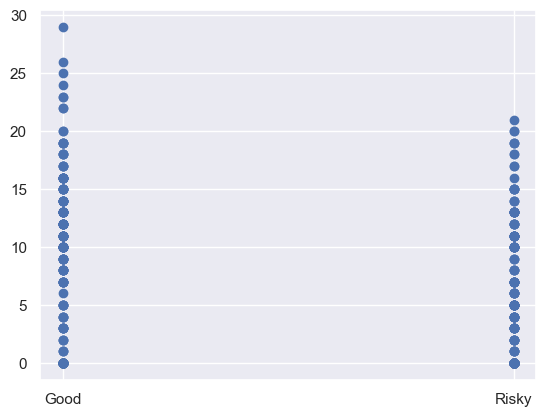

In [43]:
plt.scatter(Company_Data01.Income,Company_Data01.Advertising)
plt.show()

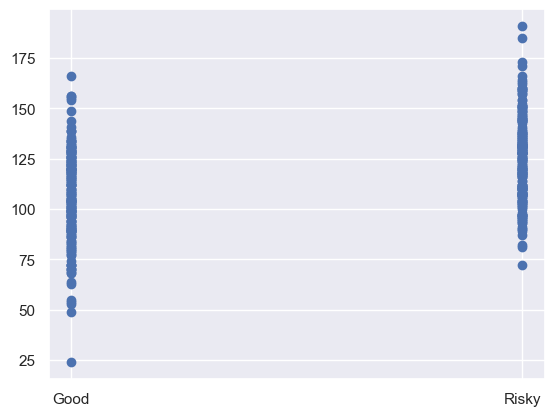

In [44]:
plt.scatter(Company_Data01.Income,Company_Data01.Price)
plt.show()

### Seaborn Libraries plots

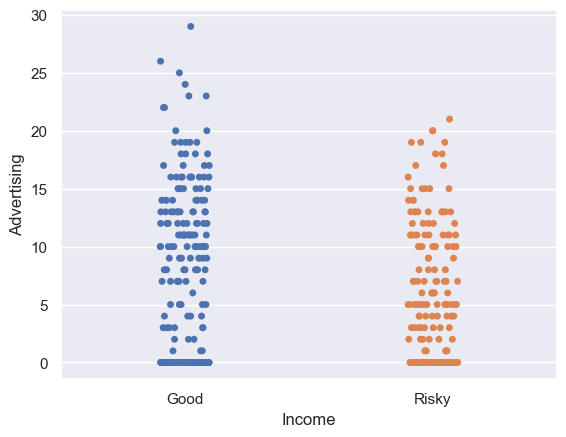

In [45]:
sns.stripplot(x='Income',y='Advertising',data=Company_Data01,jitter=True)
plt.show()
 

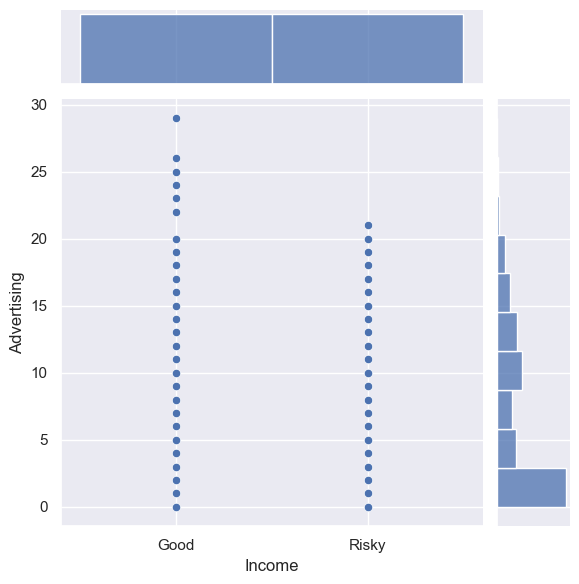

In [48]:
sns.jointplot(x='Income',y='Advertising',data=Company_Data01)
plt.show()

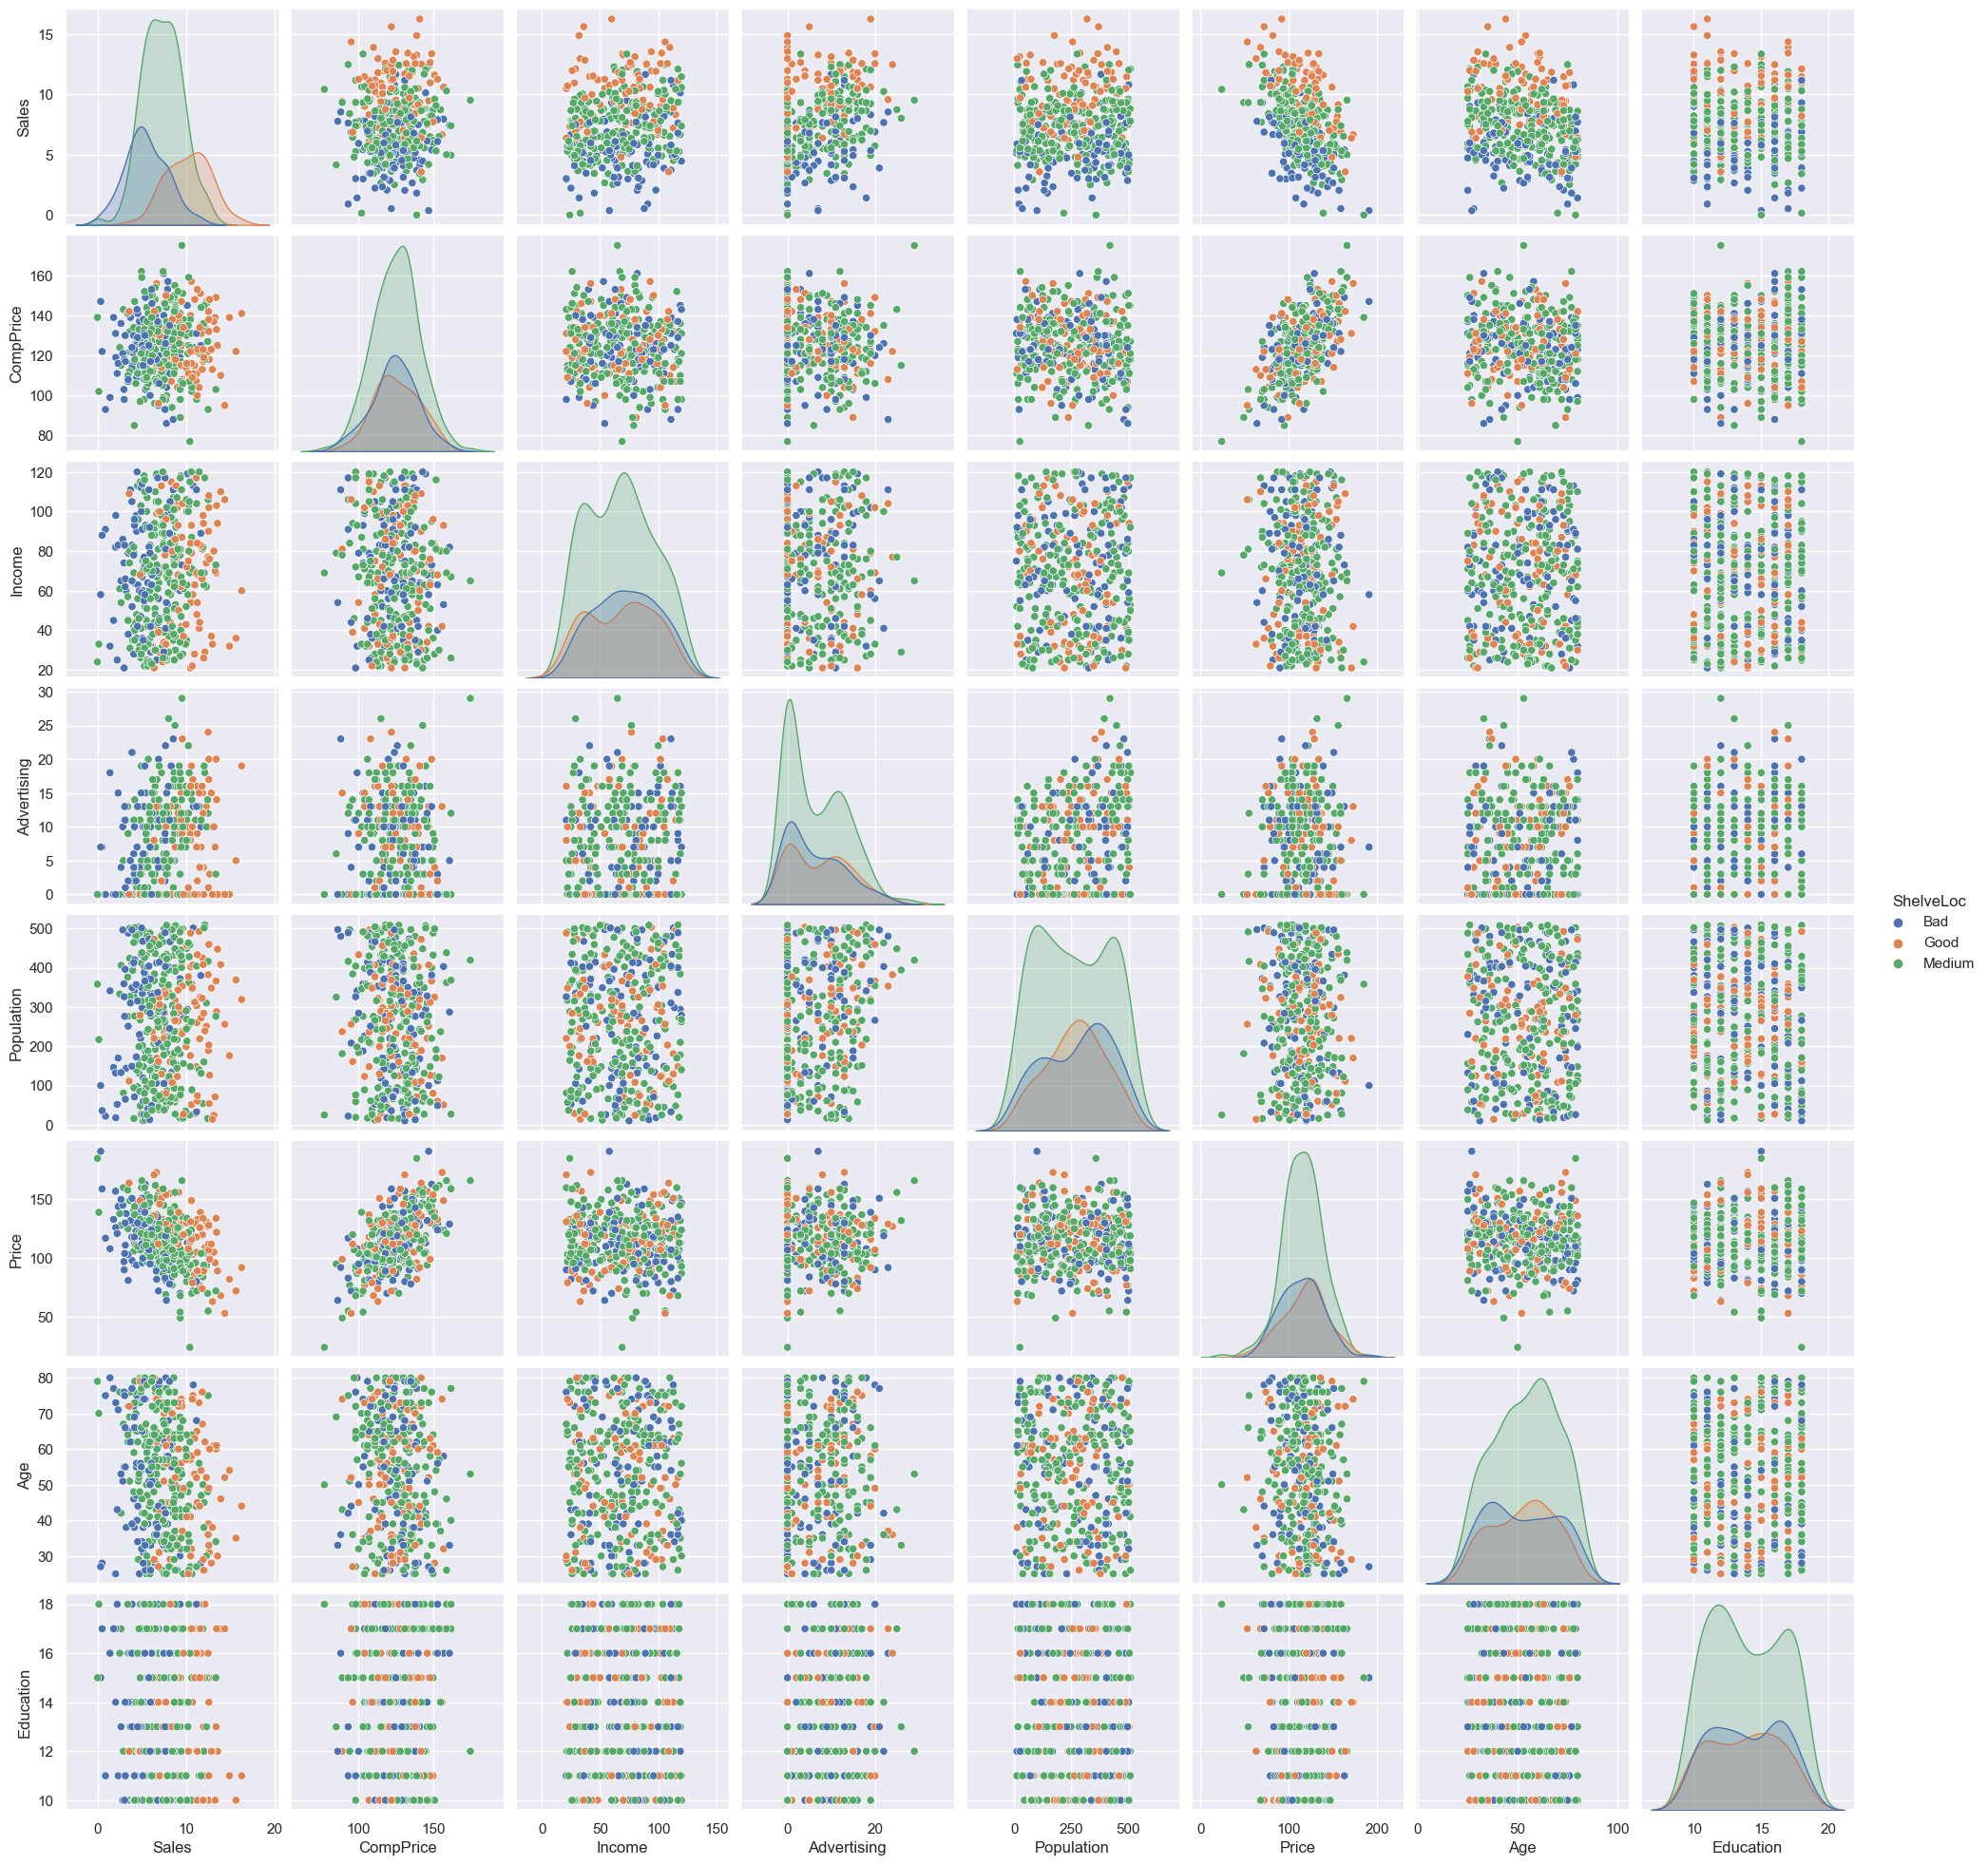

In [49]:
# pairplot
sns.pairplot(Company_Data,hue='ShelveLoc')
plt.show()

## Applying Feature Selection 

In [50]:
# Required libraries for building model
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [51]:
Company_Data01_encoded.head()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0,0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0,0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0,1
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0,1


In [52]:
X = Company_Data01_encoded.iloc[:,:-1]
y = Company_Data01_encoded['Income']

In [53]:
X

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
395,49.0,17.0,104.0,62.0,1.0,8.0,4.0,1.0,1.0
396,50.0,3.0,17.0,54.0,2.0,30.0,1.0,0.0,1.0
397,71.0,12.0,195.0,91.0,2.0,15.0,8.0,1.0,1.0
398,12.0,7.0,145.0,29.0,0.0,25.0,2.0,1.0,1.0


In [54]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Income, Length: 400, dtype: int32

In [55]:
# Separate out dataset into train test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4040)
# showing shape of data actual dividation happened or not ?
print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)


shape of x_train (320, 9)
shape of x_test (80, 9)
shape of y_train (320,)
shape of y_test (80,)


In [56]:
X_train.corr()

,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.020009,-0.037392,0.586597,0.026755,-0.091890,-0.035575,0.075413,0.016708
Advertising,-0.020009,1.000000,0.259740,0.072580,-0.000654,-0.026353,-0.047424,0.028315,0.702401
Population,-0.037392,0.259740,1.000000,0.012978,-0.082962,-0.051663,-0.064193,-0.066836,0.053381
Price,0.586597,0.072580,0.012978,1.000000,-0.006646,-0.092385,-0.030205,0.110362,0.065889
ShelveLoc,0.026755,-0.000654,-0.082962,-0.006646,1.000000,0.064601,0.007142,-0.035164,-0.064242
Age,-0.091890,-0.026353,-0.051663,-0.092385,0.064601,1.000000,-0.007344,0.066220,-0.002303
Education,-0.035575,-0.047424,-0.064193,-0.030205,0.007142,-0.007344,1.000000,-0.070307,-0.116162
Urban,0.075413,0.028315,-0.066836,0.110362,-0.035164,0.066220,-0.070307,1.000000,0.000713
US,0.016708,0.702401,0.053381,0.065889,-0.064242,-0.002303,-0.116162,0.000713,1.000000


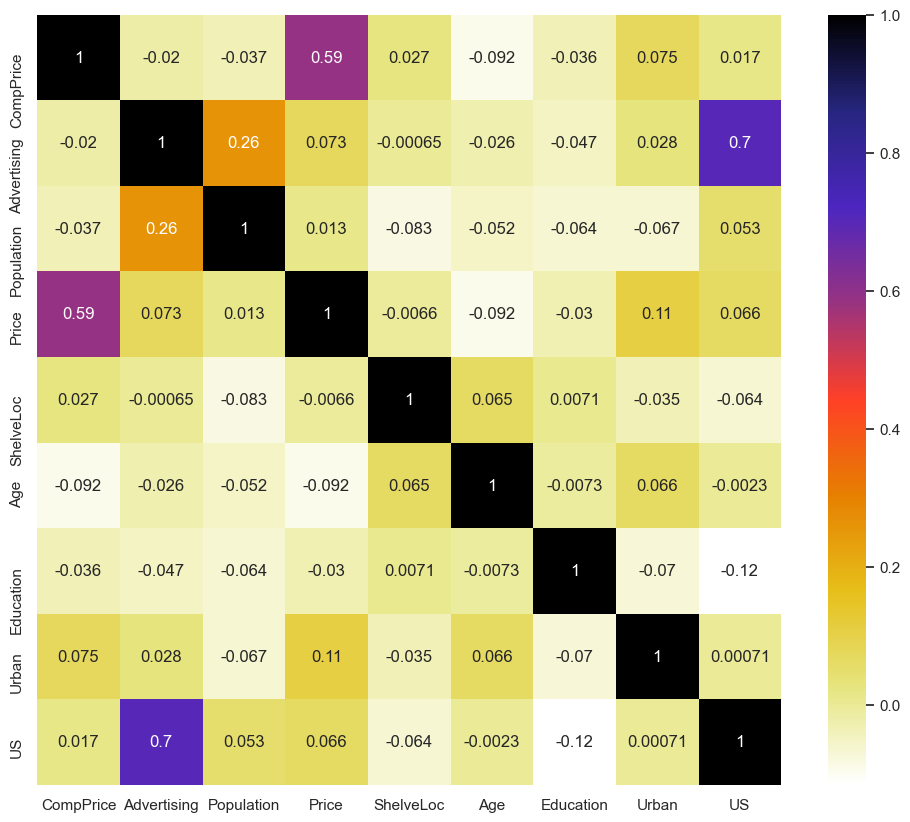

In [57]:
import seaborn as sns
# using pearson correlation,we doing correlation on training dataset only
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [58]:
# with the following feature we can select highly correlated feature 
# it wll remove the first feature that is correlated with anything other feature 

def correlation(dataset,threshold):
    col_corr = set()  # set of all the names of correlated cols 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i,j]) > threshold: # we r interesting in absolute coeff.values
                colnames = corr_metrix.columns[i]  # getting the names of cols
                col_corr.add(colnames)
    return col_corr

In [59]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

0

In [60]:
corr_features

set()

In [61]:
#print(X_train.drop(corr_features,axis = 1))
#print(X_test.drop(corr_features,axis = 1))

In [62]:
#here we have found zero correlation in our dataset X_train

In [63]:
# training decision tree classifier model
from sklearn.tree import DecisionTreeClassifier    # main classifier (applied algoritham )

### Gini

In [74]:
classifier = DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train,y_train)
#classifier.score(X_train,y_train)

DecisionTreeClassifier()

In [75]:
classifier.score(X_test,y_test)  # finding score on x y testing score method

0.75

### Score : 0.75

### Entropy

In [80]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [81]:
classifier.score(X_test,y_test)  # finding score on x y testing score method

0.65

### Less score as compare to GINI

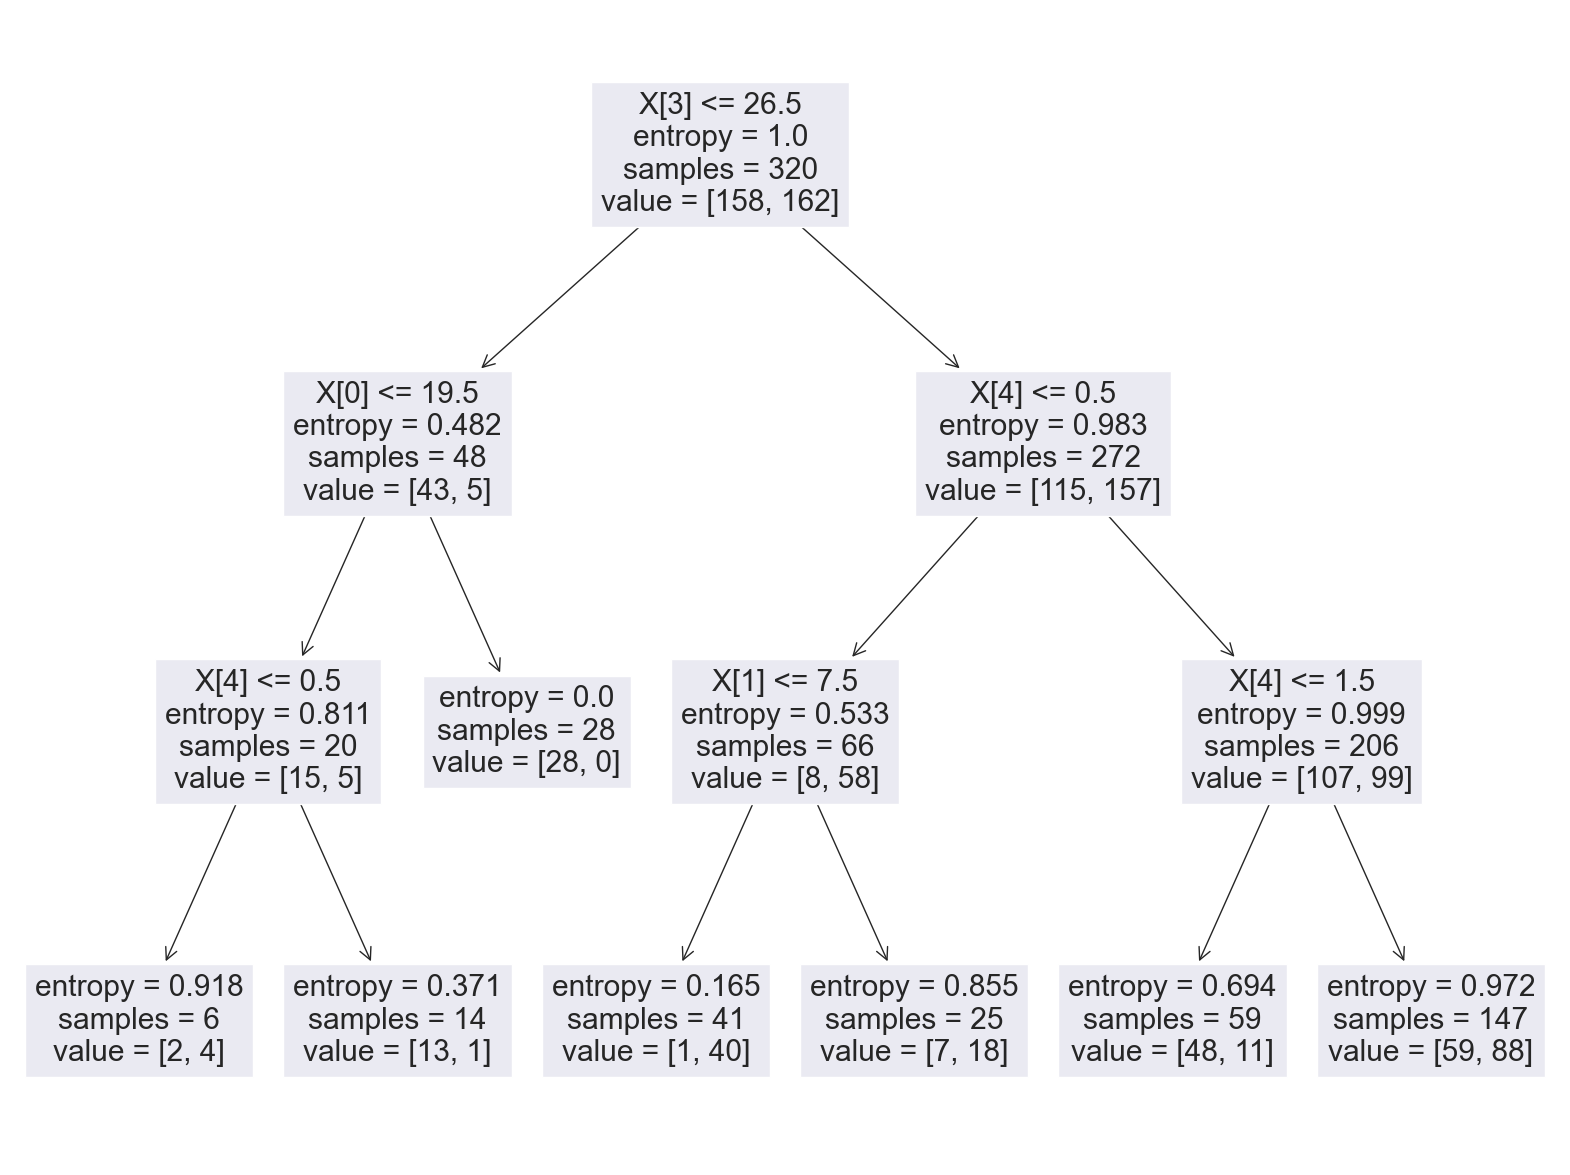

In [82]:
#PLot the decision tree
plt.figure(figsize=(20,15))
tree.plot_tree(classifier)
plt.show()


In [83]:
#Predicting on test data
preds = classifier.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    57
0    23
dtype: int64

In [84]:
#pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

In [85]:
# Accuracy 
# np.mean(preds==y_test)

### Feature scaling using standard scaler 

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
sc.fit_transform(X_train,y_train)  # fitting model on x train

array([[ 1.46587922,  0.61564918, -0.13190668, ..., -1.4538758 ,
         0.6595283 ,  0.73379939],
       [ 1.05839579, -1.02235921,  0.40223787, ...,  0.46701708,
         0.6595283 , -1.36277029],
       [ 0.175515  ,  0.91346888, -0.72963987, ...,  1.61955281,
         0.6595283 ,  0.73379939],
       ...,
       [-0.57153797, -0.87344936, -0.7423576 , ..., -1.06969723,
         0.6595283 ,  0.73379939],
       [ 0.37925672,  0.46673932,  0.91094697, ...,  1.23537424,
         0.6595283 ,  0.73379939],
       [-0.16405453,  0.02000976,  0.21147196, ...,  0.85119566,
        -1.51623516,  0.73379939]])

In [97]:
classifier_sc = DecisionTreeClassifier(criterion = 'entropy')  # decision tree classifier with gini method 
classifier_sc.fit(X_train,y_train)     # using decision tree classifier we fitting the model on x y train   

DecisionTreeClassifier(criterion='entropy')

In [98]:
classifier_sc.score(X_test,y_test)     # checking score using .score method on x y test

0.75

### Score : 0.75

In [99]:
classifier.predict(X_test)  # high prediction for seles

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [100]:
Company_Data01

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,Good,11,276,120,Bad,42,17,Yes,Yes
1,111,Good,16,260,83,Good,65,10,Yes,Yes
2,113,Good,10,269,80,Medium,59,12,Yes,Yes
3,117,Risky,4,466,97,Medium,55,14,Yes,Yes
4,141,Risky,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,Good,17,203,128,Good,33,14,Yes,Yes
396,139,Risky,3,37,120,Medium,55,11,No,Yes
397,162,Risky,12,368,159,Medium,40,18,Yes,Yes
398,100,Risky,7,284,95,Bad,50,12,Yes,Yes
